# Kyivstar Big Data Project 1

In [168]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import time

# magic word for producing visualizations in notebook
%matplotlib inline

#scikit-learn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [102]:
tabular_data = pd.read_csv('tabular_data.csv', sep=',')
hashed_feature = pd.read_csv('hashed_feature.csv', sep=',')

In [103]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

Check data types in dataset

In [104]:
print(tabular_data.info())
tabular_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61272 entries, 0 to 61271
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          61272 non-null  int64  
 1   period      61272 non-null  int64  
 2   feature_0   58460 non-null  float64
 3   feature_1   58380 non-null  float64
 4   feature_2   57795 non-null  float64
 5   feature_3   58314 non-null  float64
 6   feature_4   58425 non-null  float64
 7   feature_5   58257 non-null  float64
 8   feature_6   57814 non-null  float64
 9   feature_7   58280 non-null  float64
 10  feature_8   58338 non-null  float64
 11  feature_9   58344 non-null  float64
 12  feature_10  58318 non-null  float64
 13  feature_11  58184 non-null  float64
 14  feature_12  57847 non-null  float64
 15  feature_13  57938 non-null  float64
 16  feature_14  58366 non-null  float64
 17  feature_15  58410 non-null  float64
 18  feature_16  58193 non-null  float64
 19  feature_17  61272 non-nul

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,...,0.00,0,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,...,0.00,0,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,...,0.07,0,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,...,0.00,0,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,...,0.95,0,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0


feature_25 should be transformed

In [105]:
tabular_data.id.unique()

array([   0,    1,    2, ..., 5103, 5104, 5105], dtype=int64)

In [106]:
print(hashed_feature.shape)
print(hashed_feature.groupby('feature_50')['feature_50'].count())

(266053, 2)
feature_50
000063d721c1f034be95d0208c9b695ae4c4a7ff    15
0004424eef8f9bf1292d5db1b747974102dba0c3    12
000f3ba943b7e58a5d676205c090ef812941a160    67
00190bc7e4a8816794ab97d128bafd54b5fa7d98     3
00191d9d44fd37f680cffbb0dfc5d30ae26581ff    18
                                            ..
ffc6bd16e0f7c6f106089f3bae741006a2423afc    83
ffcba4846ef0f01e3b0476d0bf0b5d058fccb9f7    17
ffd80e85ec84a0fee0ce0af3416da95810ced13c    46
ffdae33cc90c7a30c4f70d285c0f54fdc1ee1e26     4
ffe6792b7bfe19bd83d705f0be606101fc4b5ac3    31
Name: feature_50, Length: 5009, dtype: int64


It seams that feature_50 contains non-unique values, some sort of hashed categories. Each client has several types of features assigned to him.

In [107]:
print(hashed_feature.groupby('id')['id'].count())

id
0        10
1        43
2        15
3         6
4        52
       ... 
5101    107
5102     83
5103      6
5104     10
5105      3
Name: id, Length: 5106, dtype: int64


Information about each client is divided into 12 periods.

In [108]:
print(tabular_data.groupby('id')['id'].count())

id
0       12
1       12
2       12
3       12
4       12
        ..
5101    12
5102    12
5103    12
5104    12
5105    12
Name: id, Length: 5106, dtype: int64


In [109]:
hashed_feature.head()

,id,feature_50
0,0,7984b0a0e139cabadb5afc7756d473fb34d23819
1,0,47904b3331202e9881d003ff449c2eabfbc75460
2,0,a99c4b3af723874ddd85af322beea81b64437294
3,0,4dce5381031a88aed6b12ef71b6f7c3148e7b3c8
4,0,d62db721202cb6636887f450a7b77fa97db03b05


It is possible to perform one hot encoding with values from feature_50

In [110]:
label_encoder = LabelEncoder()

In [111]:
def label_encoding(hashed_ft_df):
    
    hashed_ft_df['feature_50'] = hashed_ft_df['feature_50'].astype(str)
    hashed_ft_df['feature_50_cat'] = label_encoder.fit_transform(hashed_ft_df['feature_50'])
    
    return hashed_ft_df

In [112]:
encoded_df = label_encoding(hashed_feature)
encoded_df

,id,feature_50,feature_50_cat
0,0,7984b0a0e139cabadb5afc7756d473fb34d23819,2367
1,0,47904b3331202e9881d003ff449c2eabfbc75460,1404
2,0,a99c4b3af723874ddd85af322beea81b64437294,3314
3,0,4dce5381031a88aed6b12ef71b6f7c3148e7b3c8,1543
4,0,d62db721202cb6636887f450a7b77fa97db03b05,4179
...,...,...,...
266048,5104,b800c944804d341038e06d26cf560562942069e9,3588
266049,5104,442e9a74e42ad60348408428654a686c4ed222ee,1320
266050,5105,ff3c67182640fdbd26d2273a87c3311f45c68ae2,4991
266051,5105,95ea6c6f652cb29edc327a2449eb8115ebc6841e,2949


In [113]:
def transform_hashed_feature(hashed_ft_df):
    
    cols_names = hashed_ft_df['feature_50_cat'].unique()
    print(cols_names)
    indexes = hashed_ft_df['id'].unique()
    print(indexes)
    encoded_df = pd.DataFrame(columns=cols_names, index=indexes)
    encoded_df = encoded_df.fillna(0)
    
    for index, row in hashed_ft_df.iterrows():
        index_name = row['id']
        cat_value = row['feature_50_cat']
        encoded_df.loc[encoded_df.index == index_name, cat_value] = 1
        
    return encoded_df

encoded_df = transform_hashed_feature(encoded_df)
encoded_df.head()

[2367 1404 3314 ... 3457 4333 4728]
[   0    1    2 ... 5103 5104 5105]


,2367,1404,3314,1543,4179,1317,3597,3038,617,2330,...,2718,3017,2310,402,3018,279,29,3457,4333,4728
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
tabular_data.shape

(61272, 52)

feature_25 contains 8 categories, with hashed values. Those values should be label encoded.

In [115]:
tabular_data.feature_25.unique()

array(['f9ae10397ed62e79c644d06842bbcd92963a5927',
       '11e623a37e87cf7995c466723ec99688d55cae8c',
       'aa2c96dacf00c451ef465f6115a45a20bccf1256',
       'b204e1e3743cc314841070435211e25f4602b9fd',
       '390c481a740bb1c12c57f33dc5263ced2ab11796',
       'cf3cca1da7361bd988642600e76c4a3021be8ccf',
       'd458ece2abeae803254c5d442b2e2a80f58a4153',
       'cf7413906c99be47067cb3fb6299959857710d77'], dtype=object)

In [116]:
tabular_data['feature_25'] = tabular_data['feature_25'].astype(str)
tabular_data['feature_25'] = label_encoder.fit_transform(tabular_data['feature_25'])

In [117]:
print(type(tabular_data.isna().sum()))

<class 'pandas.core.series.Series'>


Check the percentage of missing data.

In [118]:
def calculate_missing_data(df):
    
    missing_cols_df = pd.Series(df.isna().sum(), name='num').to_frame()
    missing_cols_df = missing_cols_df.assign(percentage=lambda x: round((x.num * 100 / df.shape[0]),2))
    
    missing_rows_df = pd.Series(df.isna().sum(axis=1)[df.isna().sum(axis=1)>38], name='num').to_frame()
    missing_rows_df = missing_rows_df.assign(percentage=lambda x: round((x.num * 100 / df.shape[1]),2))
    
    print('Missind data COLUMNs wise: \n', 
          missing_cols_df, missing_cols_df.shape)
    print('Missind data COLUMNs wise: \n',
          missing_rows_df, missing_rows_df.shape)
    return missing_cols_df, missing_rows_df 

In [119]:
missing_cols_df, missing_rows_df = calculate_missing_data(tabular_data)

Missind data COLUMNs wise: 
              num  percentage
id             0        0.00
period         0        0.00
feature_0   2812        4.59
feature_1   2892        4.72
feature_2   3477        5.67
feature_3   2958        4.83
feature_4   2847        4.65
feature_5   3015        4.92
feature_6   3458        5.64
feature_7   2992        4.88
feature_8   2934        4.79
feature_9   2928        4.78
feature_10  2954        4.82
feature_11  3088        5.04
feature_12  3425        5.59
feature_13  3334        5.44
feature_14  2906        4.74
feature_15  2862        4.67
feature_16  3079        5.03
feature_17     0        0.00
feature_18  3060        4.99
feature_19  3564        5.82
feature_20  2941        4.80
feature_21  2809        4.58
feature_22  2873        4.69
feature_23  3099        5.06
feature_24  2951        4.82
feature_25     0        0.00
feature_26  2668        4.35
feature_27  2899        4.73
feature_28  2998        4.89
feature_29  2462        4.02
feature_30  28

The percentage of missing data is not high. Therefore, I think it is best to impute them.

C:\Users\Nami_Kaneko\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


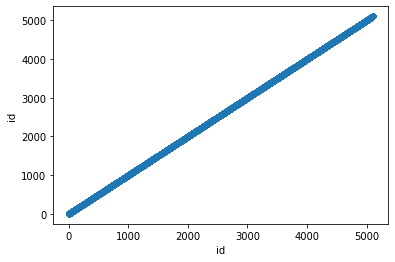

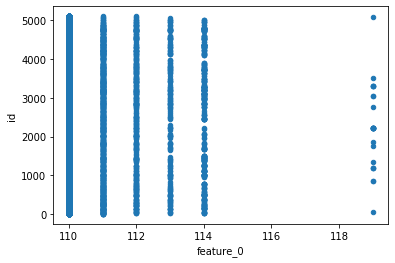

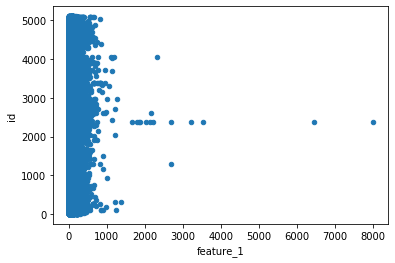

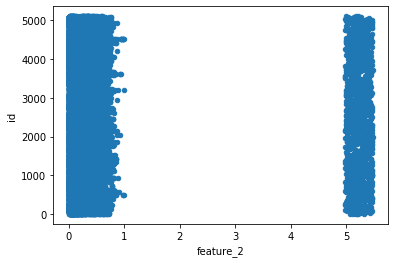

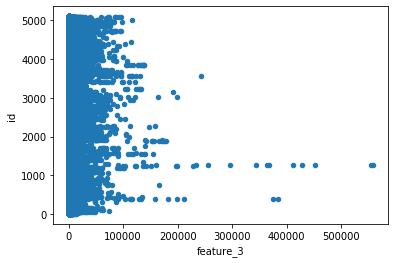

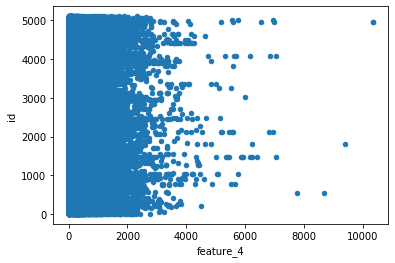

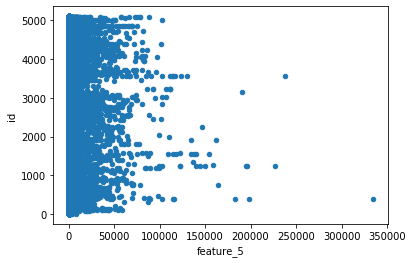

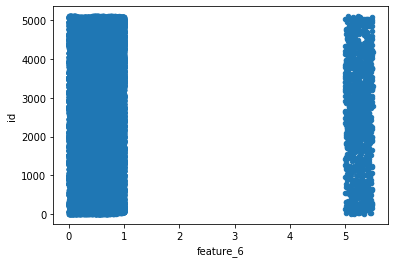

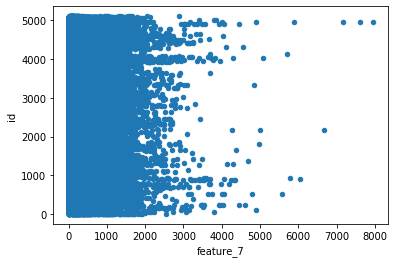

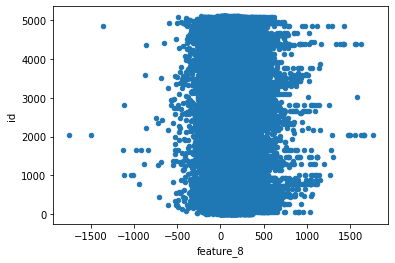

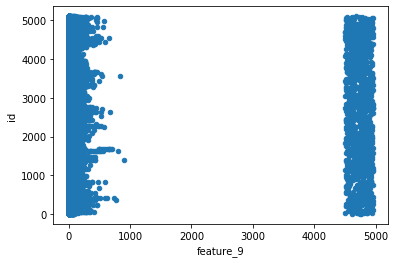

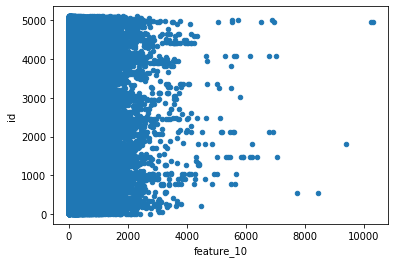

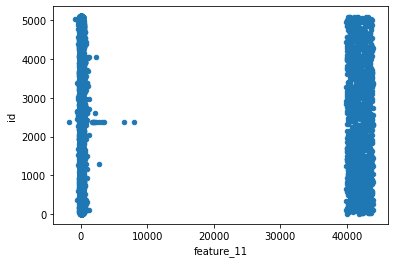

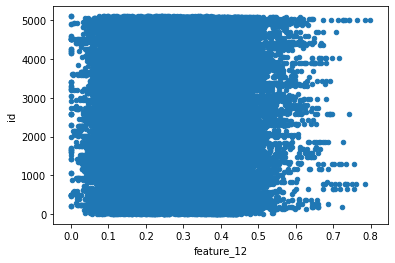

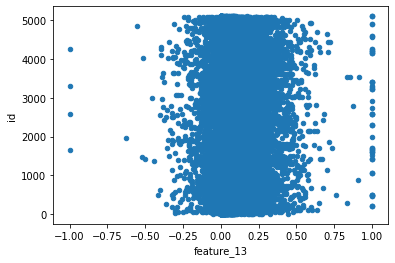

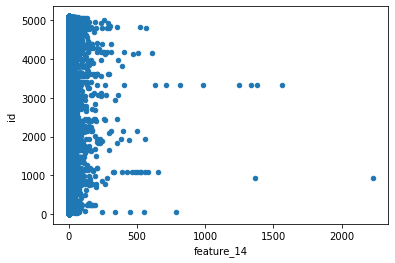

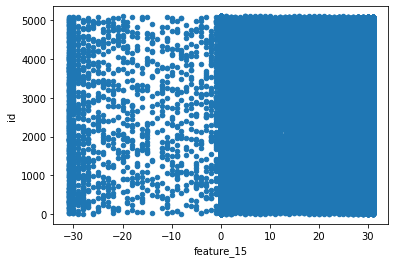

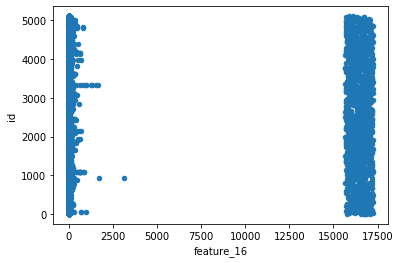

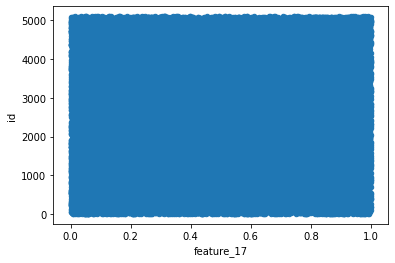

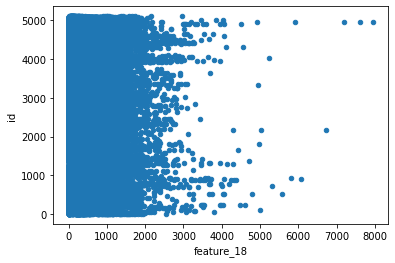

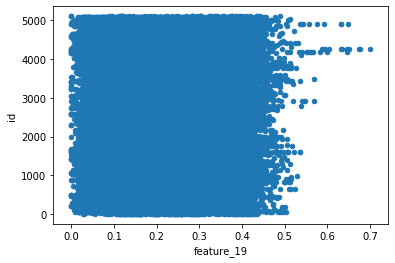

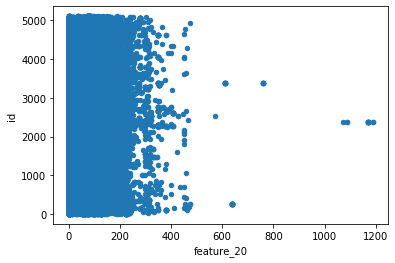

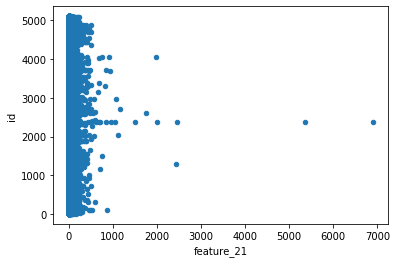

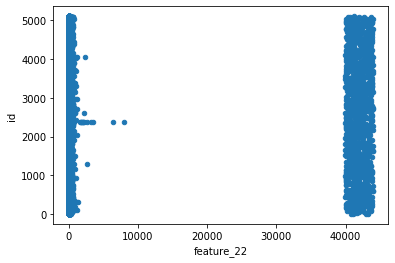

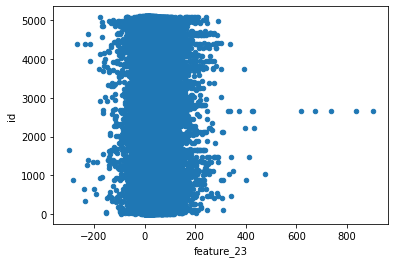

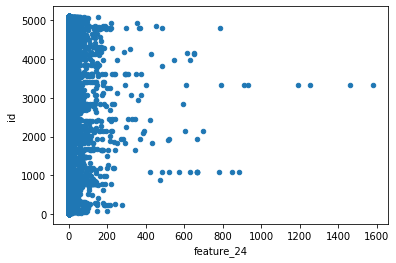

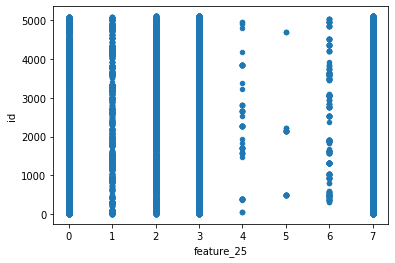

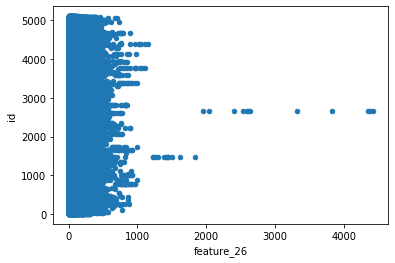

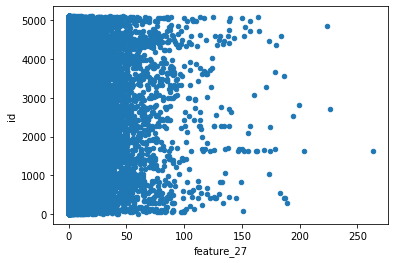

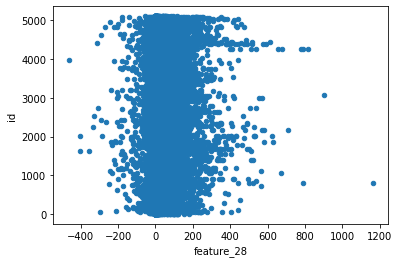

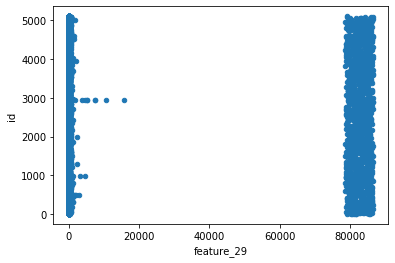

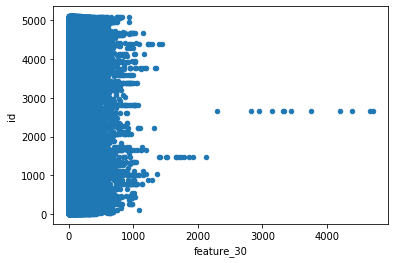

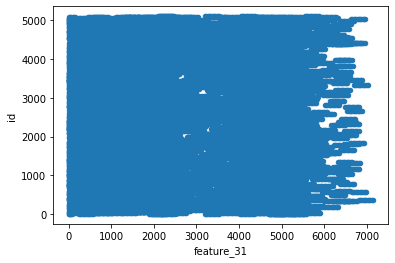

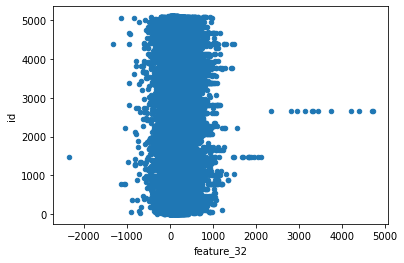

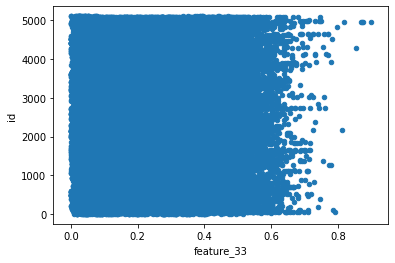

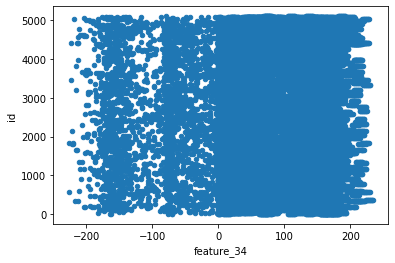

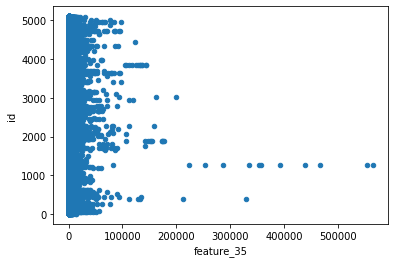

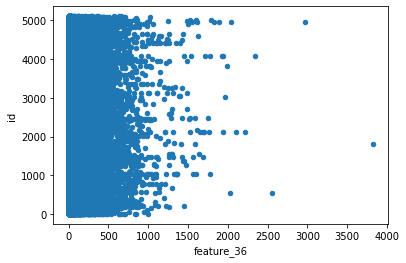

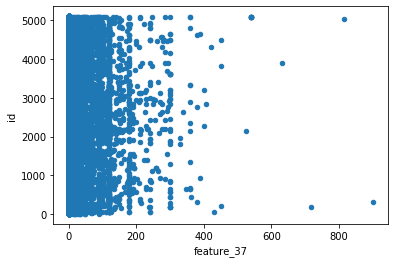

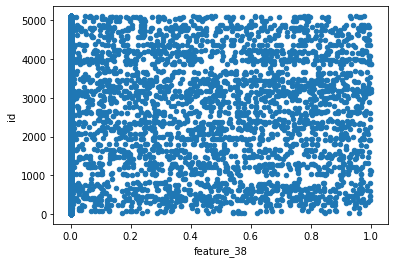

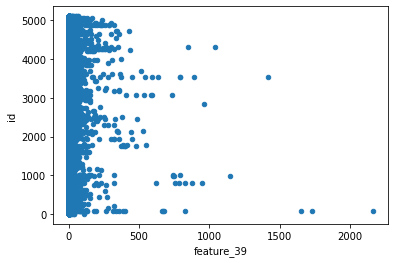

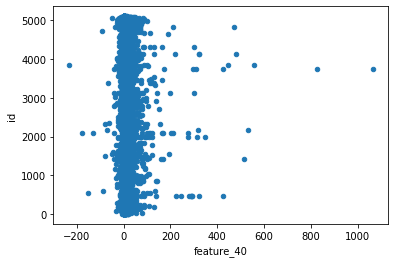

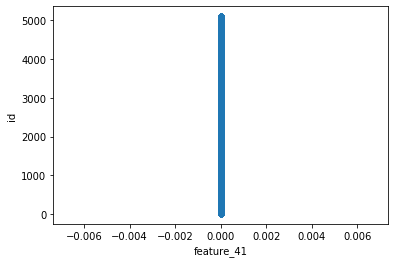

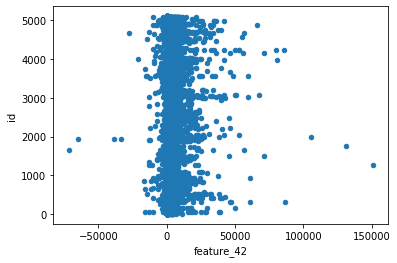

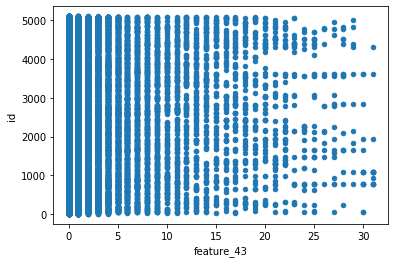

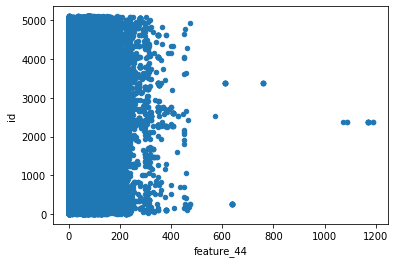

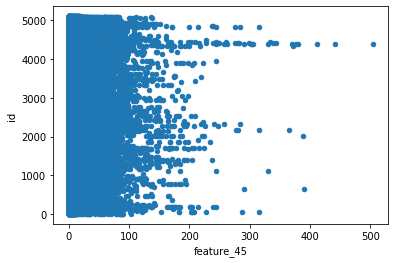

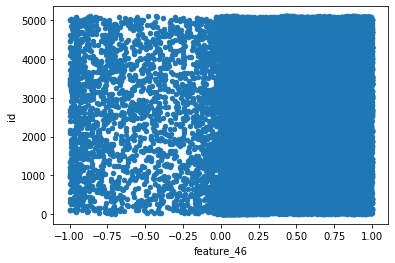

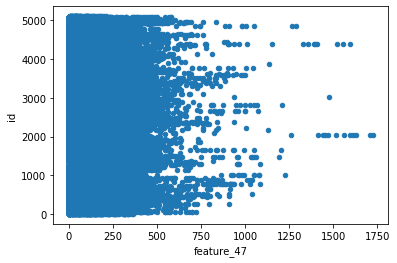

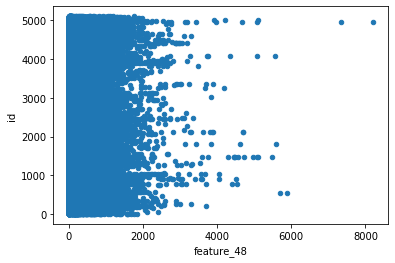

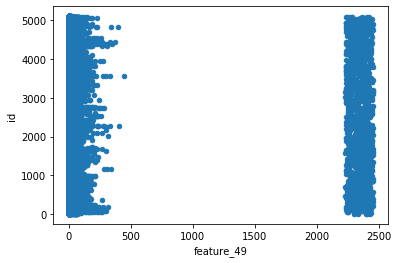

In [120]:
def show_outliers():
    for column in list(tabular_data.columns.values):
        if column != 'period':
            tabular_data.plot(x=column, y='id', kind='scatter')
show_outliers()

In [121]:
for column in list(tabular_data.columns.values):
    if column not in ['period', 'feature_0', 'feature_25', 'feature_38', 'feature_43', 'feature_5','feature_14', 
                      'feature_16', 'feature_24', 'feature_37', 'feature_39', 'feature_41']:
        Q1 = tabular_data[column].quantile(0.25)
        Q3 = tabular_data[column].quantile(0.75)
        IQR = Q3-Q1
        lower_lim = Q1 - 1.5*IQR
        upper_lim = Q3 + 1.5*IQR
        
        tabular_data.loc[(tabular_data[column] > upper_lim),column] = upper_lim
        tabular_data.loc[(tabular_data[column] < lower_lim),column] = lower_lim

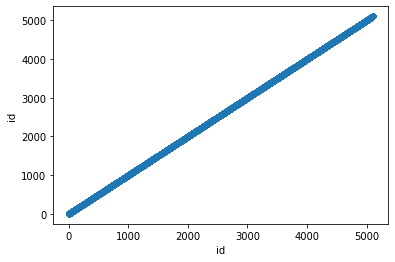

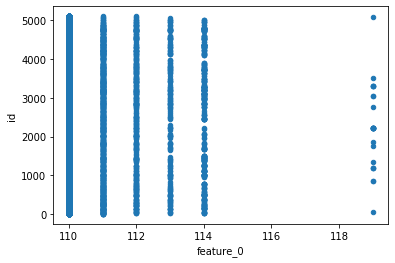

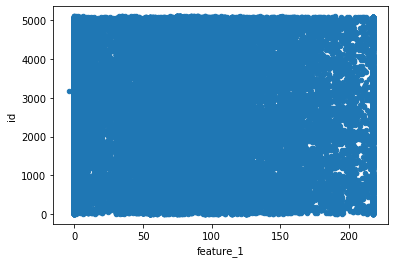

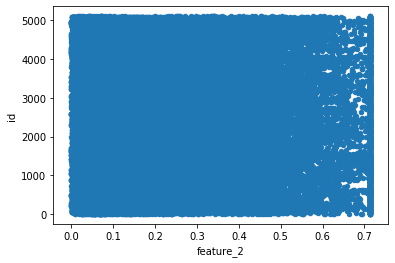

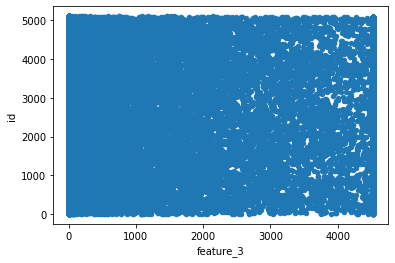

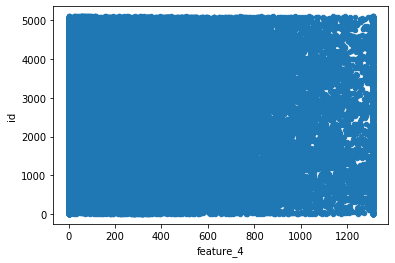

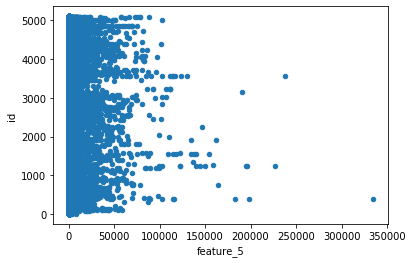

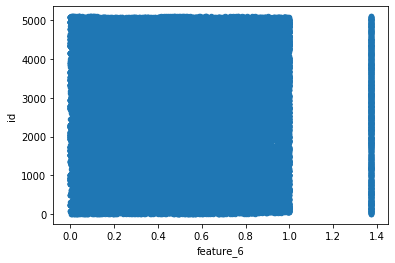

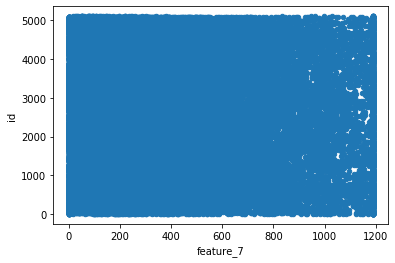

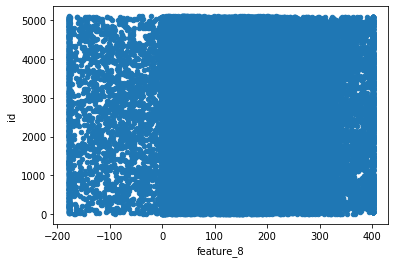

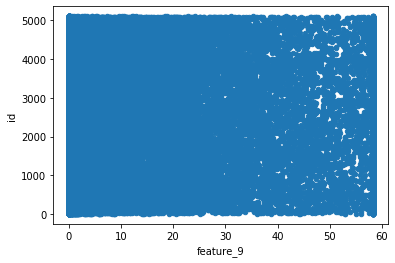

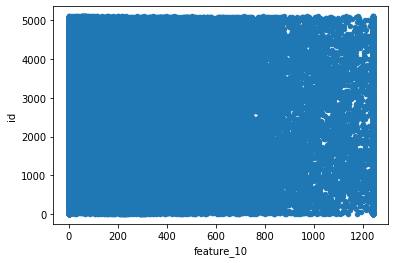

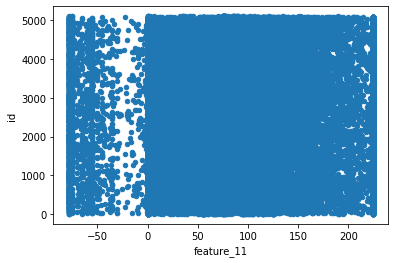

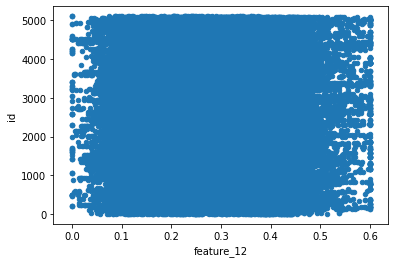

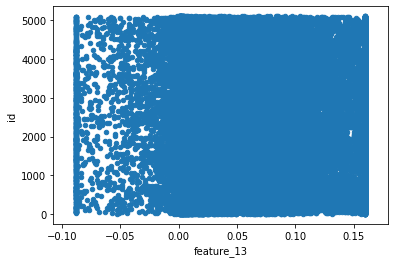

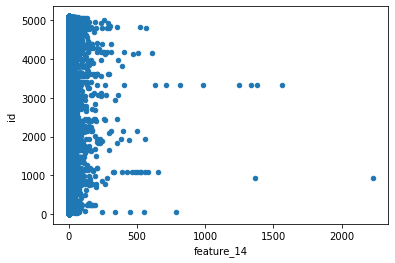

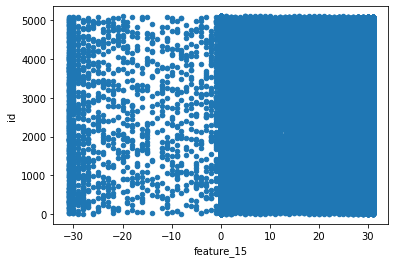

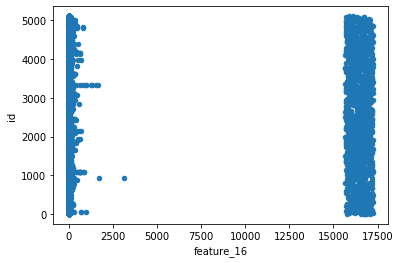

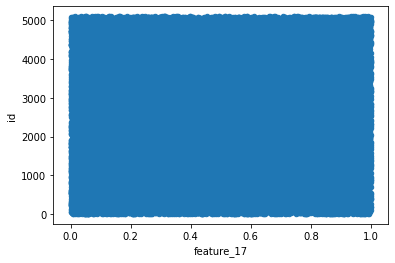

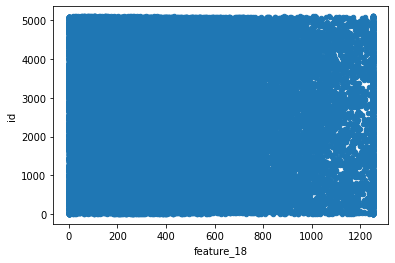

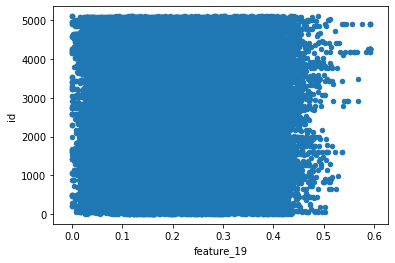

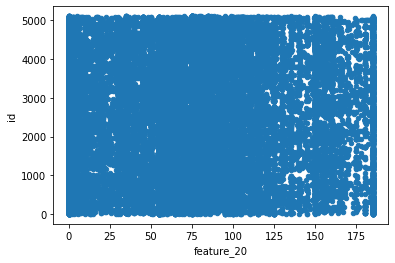

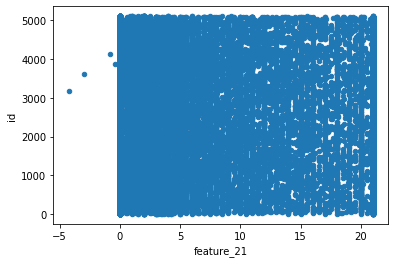

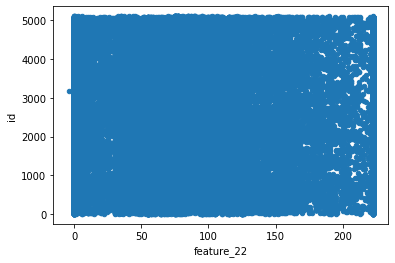

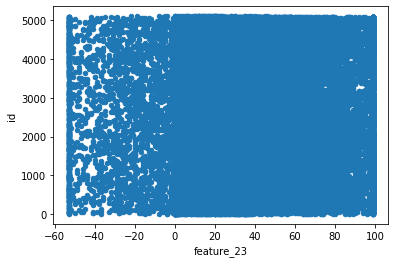

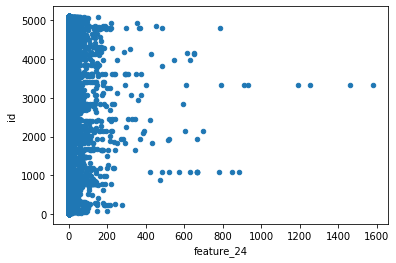

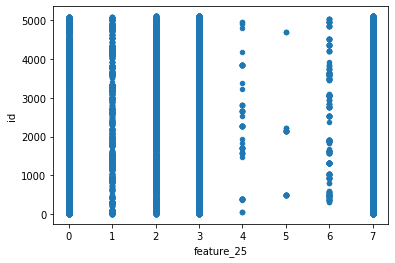

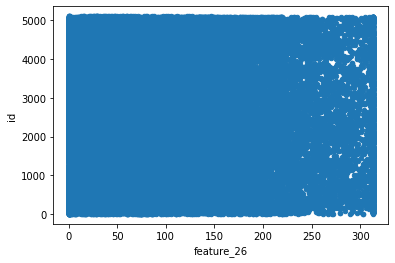

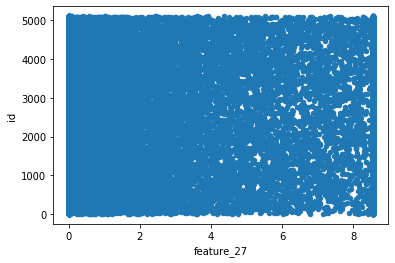

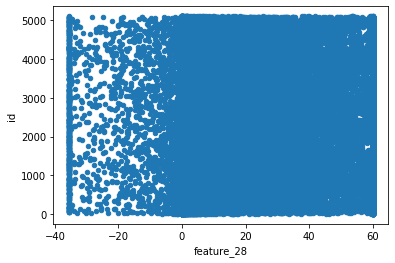

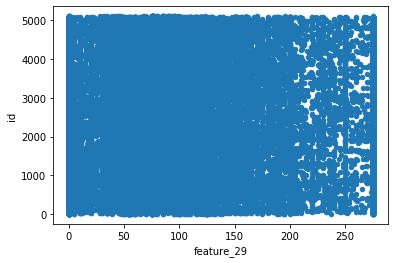

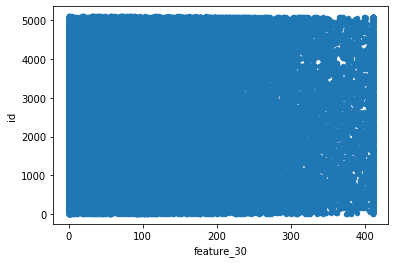

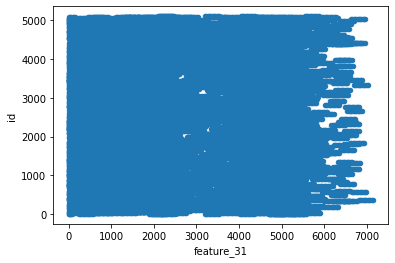

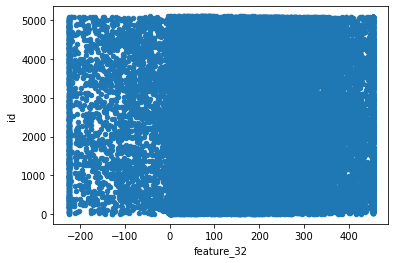

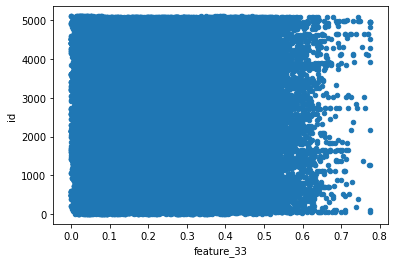

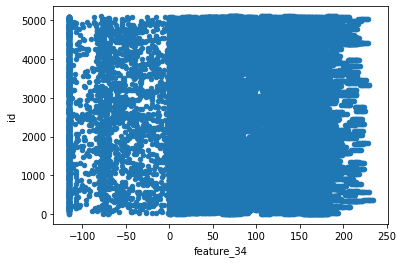

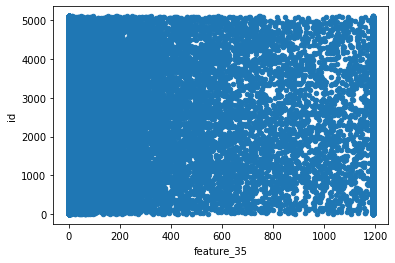

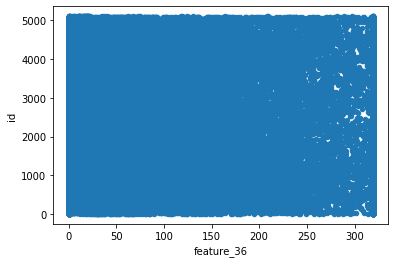

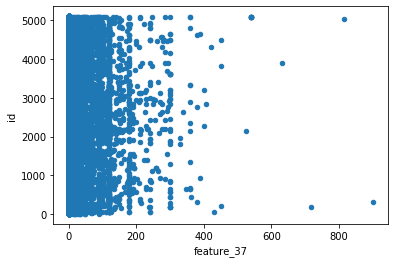

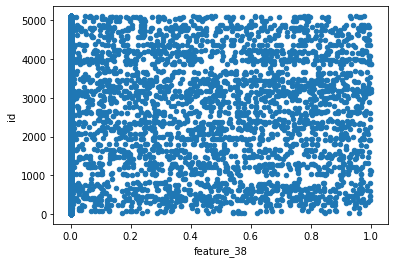

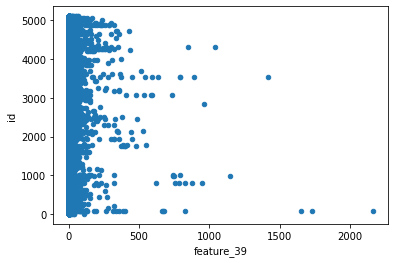

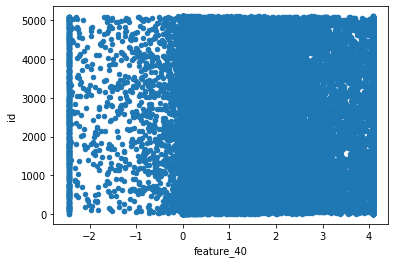

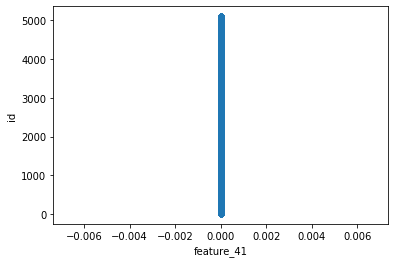

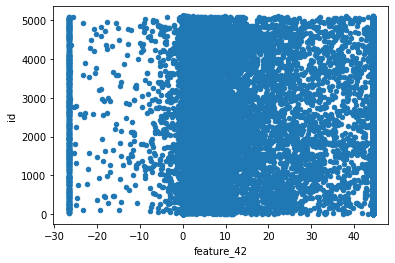

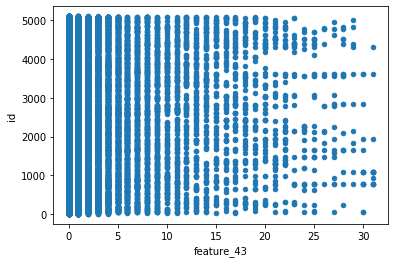

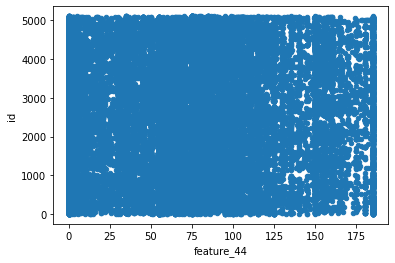

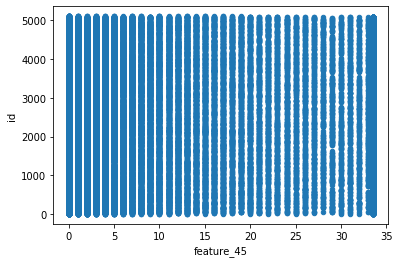

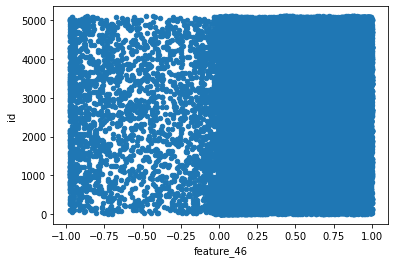

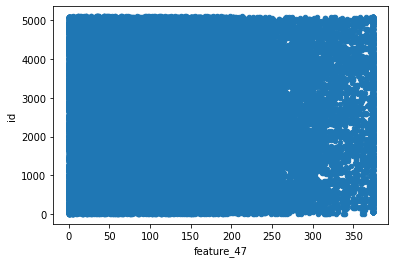

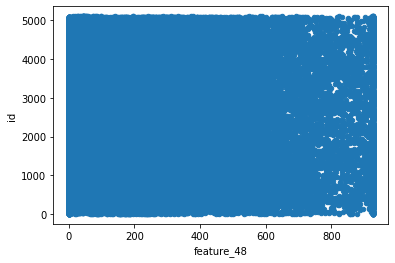

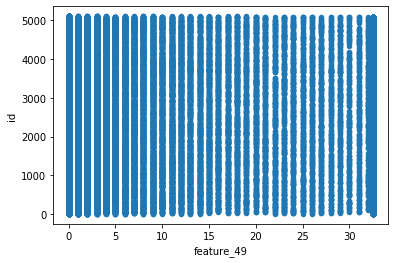

In [122]:
show_outliers()

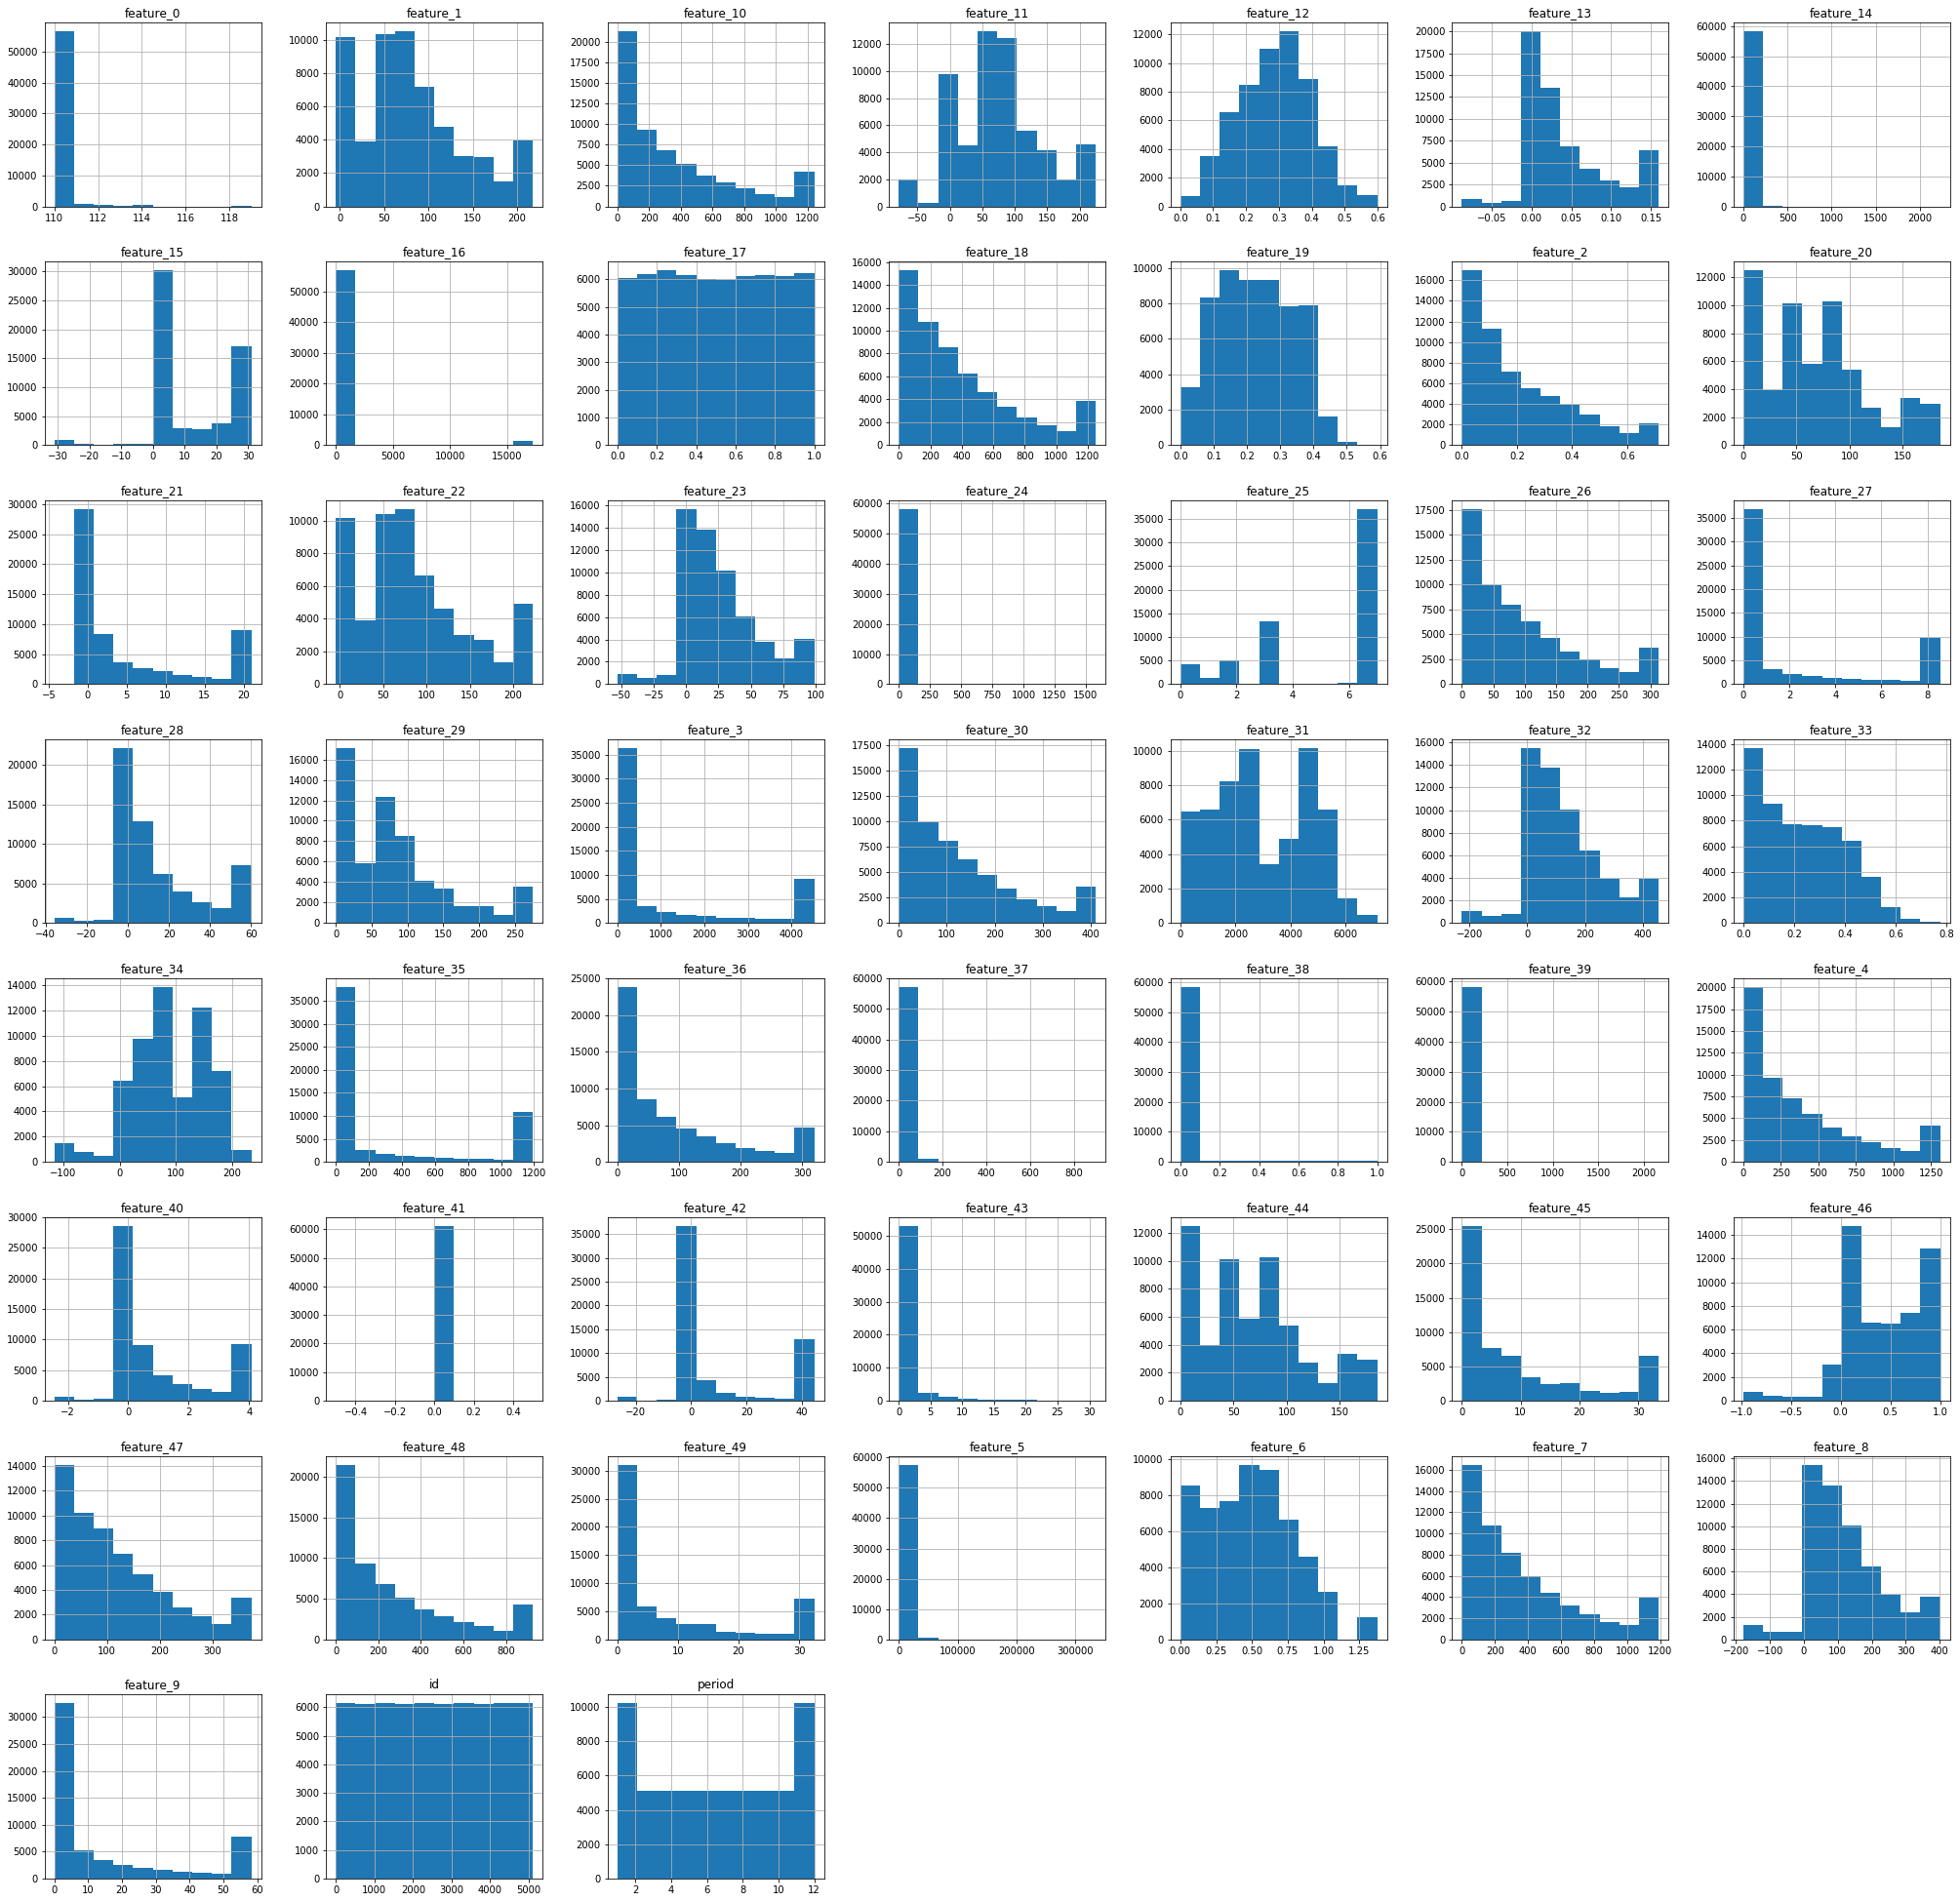

In [123]:
tabular_data.hist(figsize = (35,35))
plt.show()

In [124]:
def get_unique_values(df):
    dict_unique_values = {}
    for col in df.columns:
        dict_unique_values[col] = df[col].unique()
        
    for key, value in dict_unique_values.items():
        print(f'{key}, => {len(value)}')

In [125]:
get_unique_values(tabular_data)

id, => 5106
period, => 12
feature_0, => 7
feature_1, => 8426
feature_2, => 53563
feature_3, => 24152
feature_4, => 31411
feature_5, => 11469
feature_6, => 55251
feature_7, => 32039
feature_8, => 583
feature_9, => 3409
feature_10, => 30333
feature_11, => 8608
feature_12, => 54769
feature_13, => 41401
feature_14, => 261
feature_15, => 64
feature_16, => 1582
feature_17, => 61272
feature_18, => 33001
feature_19, => 54841
feature_20, => 5638
feature_21, => 1477
feature_22, => 8404
feature_23, => 154
feature_24, => 273
feature_25, => 8
feature_26, => 315
feature_27, => 515
feature_28, => 4523
feature_29, => 3892
feature_30, => 413
feature_31, => 6599
feature_32, => 682
feature_33, => 55168
feature_34, => 352
feature_35, => 18293
feature_36, => 14233
feature_37, => 453
feature_38, => 3064
feature_39, => 2411
feature_40, => 634
feature_41, => 1
feature_42, => 16581
feature_43, => 33
feature_44, => 5637
feature_45, => 36
feature_46, => 52866
feature_47, => 376
feature_48, => 26835
feature_49, =

In [126]:
def drop_rows(df, missing_rows):
    
    return df[~df.index.isin(missing_rows.index)]
    

In [127]:
tabular_copy = tabular_data.copy()
#tabular_copy = drop_rows(tabular_copy, missing_rows_df)

In [128]:
def feature_engineering(df):
    
    #imputing with most frequent
    for col in df.columns:
        
        df[col] = df.groupby('period')[col].transform(lambda x: x.fillna(x.median()))
        #df[col].fillna(df[col].value_counts().idxmax(), inplace=True)
        print(f'Imputed {col}')


In [129]:
feature_engineering(tabular_copy)

Imputed id
Imputed period
Imputed feature_0
Imputed feature_1
Imputed feature_2
Imputed feature_3
Imputed feature_4
Imputed feature_5
Imputed feature_6
Imputed feature_7
Imputed feature_8
Imputed feature_9
Imputed feature_10
Imputed feature_11
Imputed feature_12
Imputed feature_13
Imputed feature_14
Imputed feature_15
Imputed feature_16
Imputed feature_17
Imputed feature_18
Imputed feature_19
Imputed feature_20
Imputed feature_21
Imputed feature_22
Imputed feature_23
Imputed feature_24
Imputed feature_25
Imputed feature_26
Imputed feature_27
Imputed feature_28
Imputed feature_29
Imputed feature_30
Imputed feature_31
Imputed feature_32
Imputed feature_33
Imputed feature_34
Imputed feature_35
Imputed feature_36
Imputed feature_37
Imputed feature_38
Imputed feature_39
Imputed feature_40
Imputed feature_41
Imputed feature_42
Imputed feature_43
Imputed feature_44
Imputed feature_45
Imputed feature_46
Imputed feature_47
Imputed feature_48
Imputed feature_49


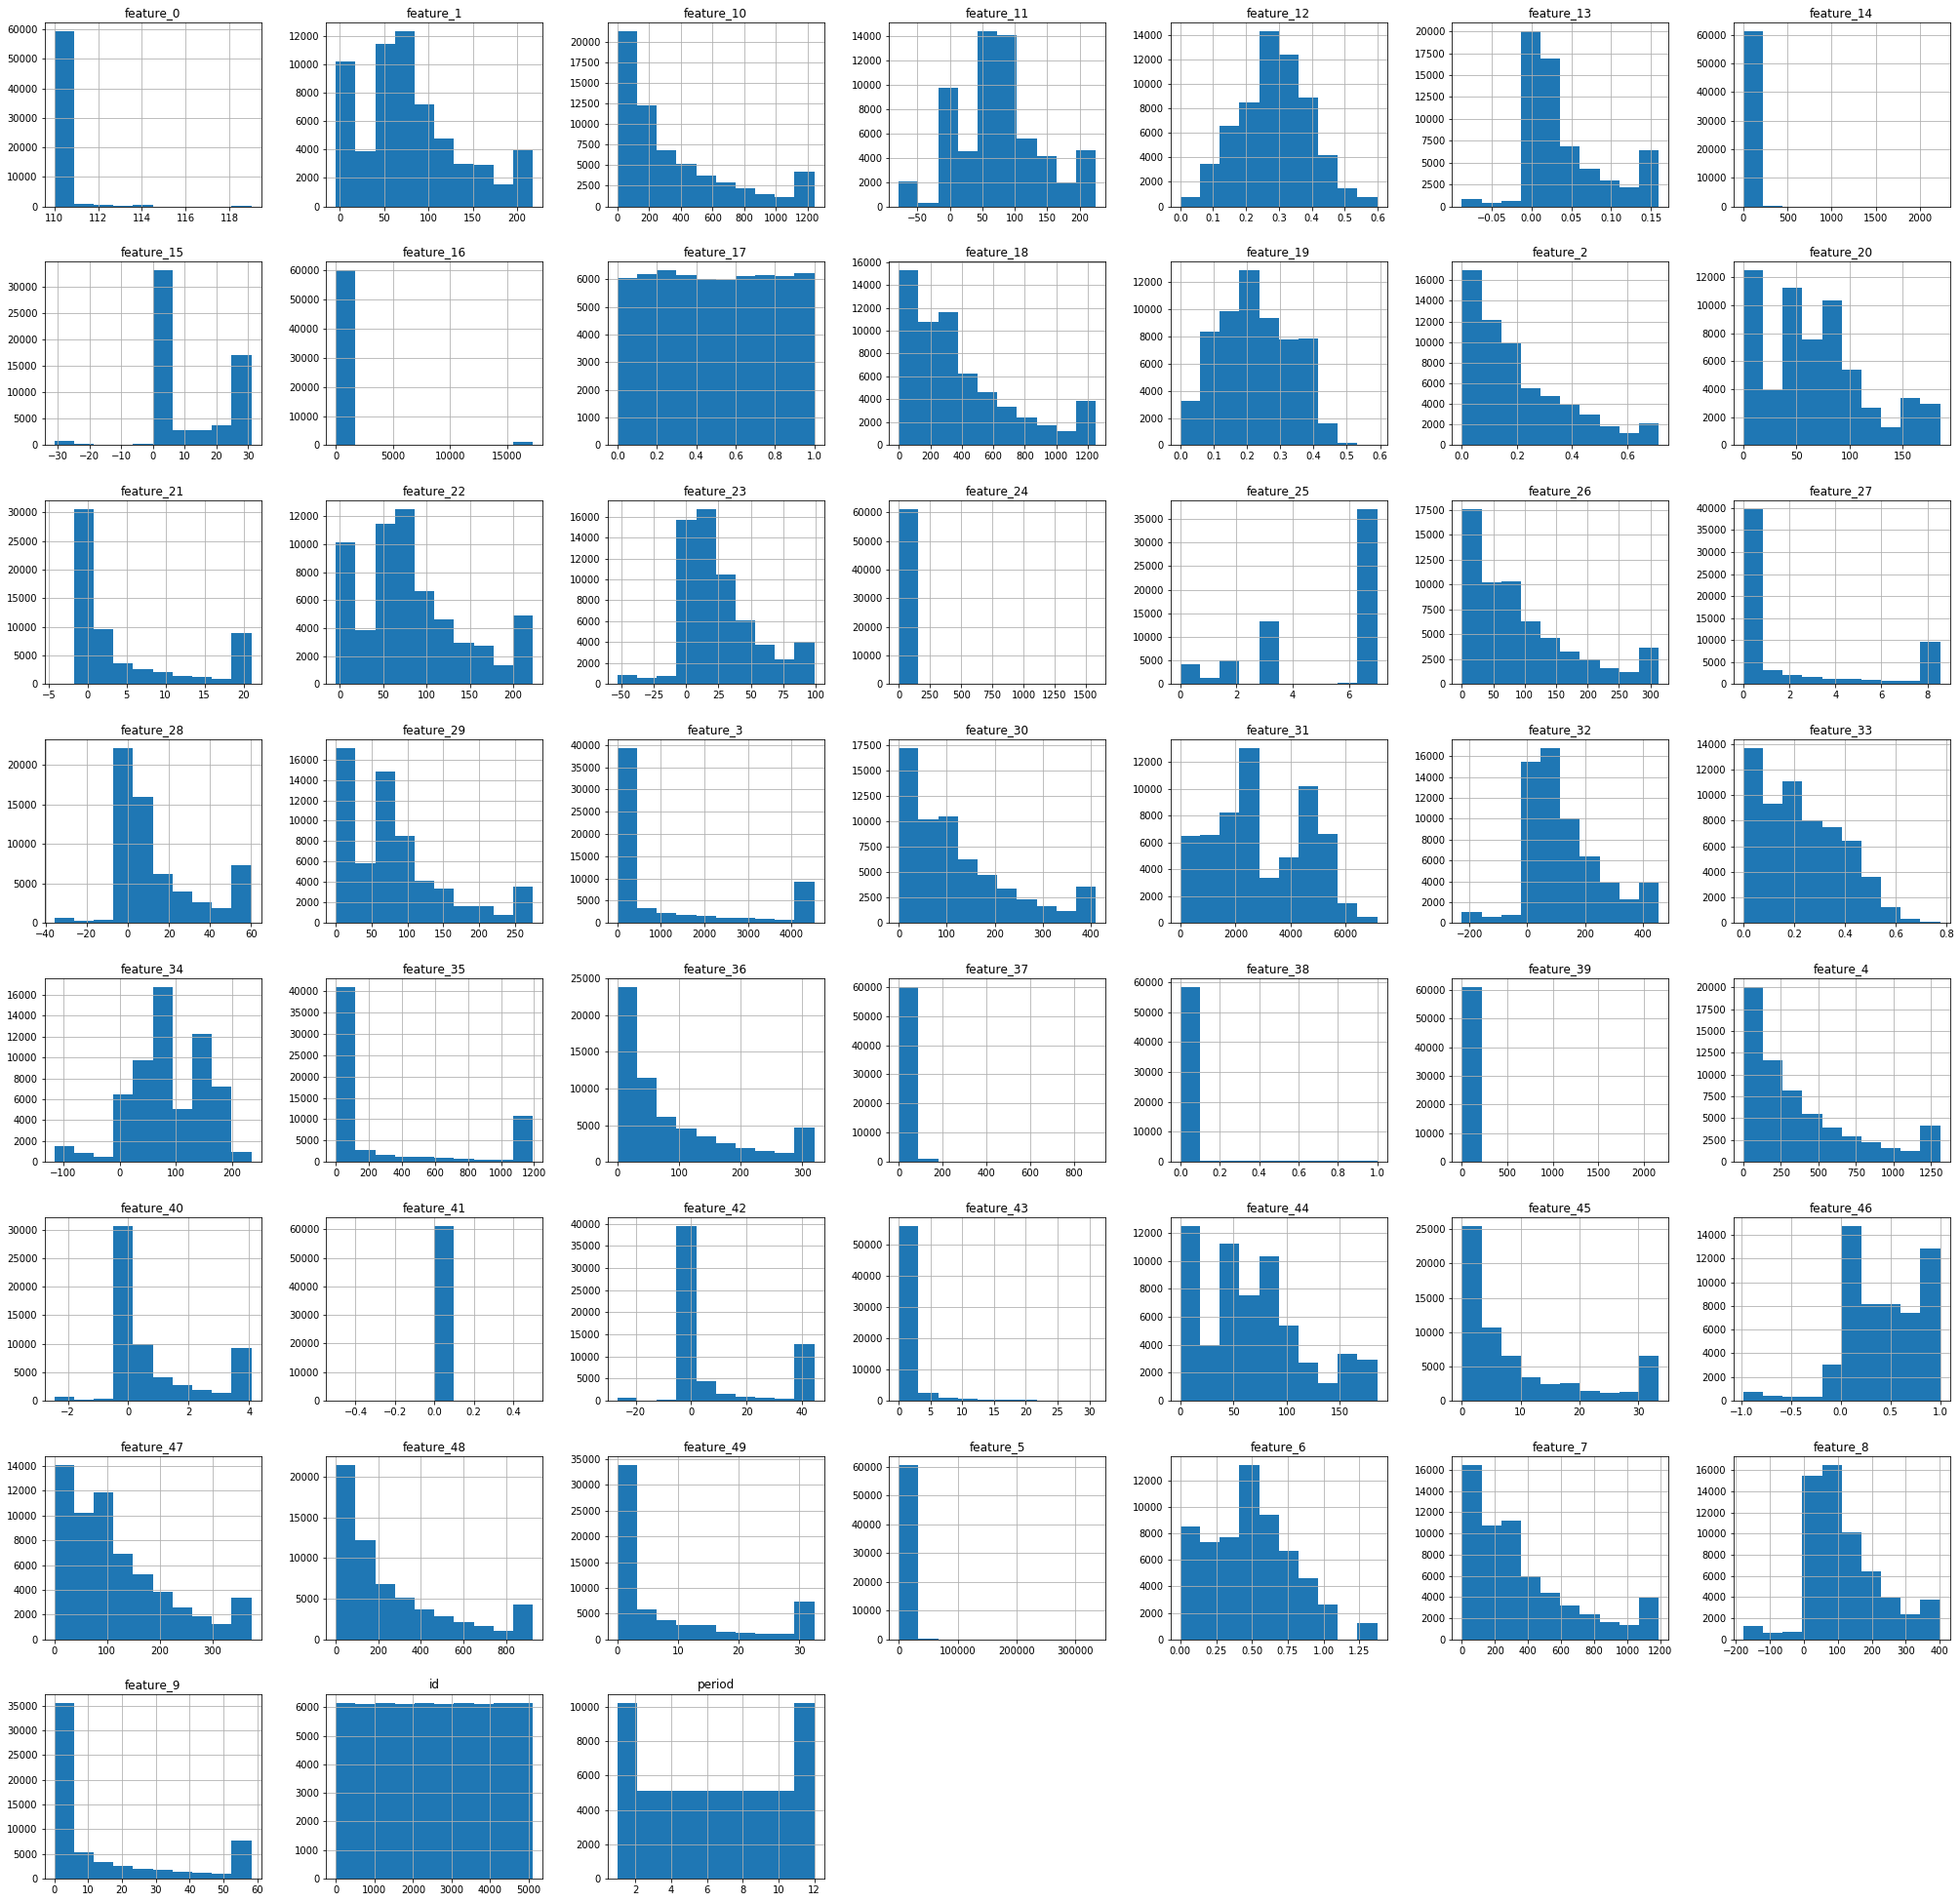

In [130]:
tabular_copy.hist(figsize = (35,35))
plt.show()

In [131]:
tabular_copy.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0.0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,253.425,...,0.00,0,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0
1,0.0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,280.800,...,0.00,0,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0
2,0.0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,262.600,...,0.07,0,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0
3,0.0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,253.850,...,0.00,0,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0
4,0.0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,267.000,...,0.95,0,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0


In [132]:
def perform_log_transform(df):
    df_log = pd.DataFrame()

    for col in df.columns:
        if col == 'id' or col == 'period':
            df_log[col] = df[col]
        else: 
            df_log[col] = (df[col]-df[col].min()+1).transform(np.log)
    return df_log

In [133]:
tabular_log_copy = perform_log_transform(tabular_copy)

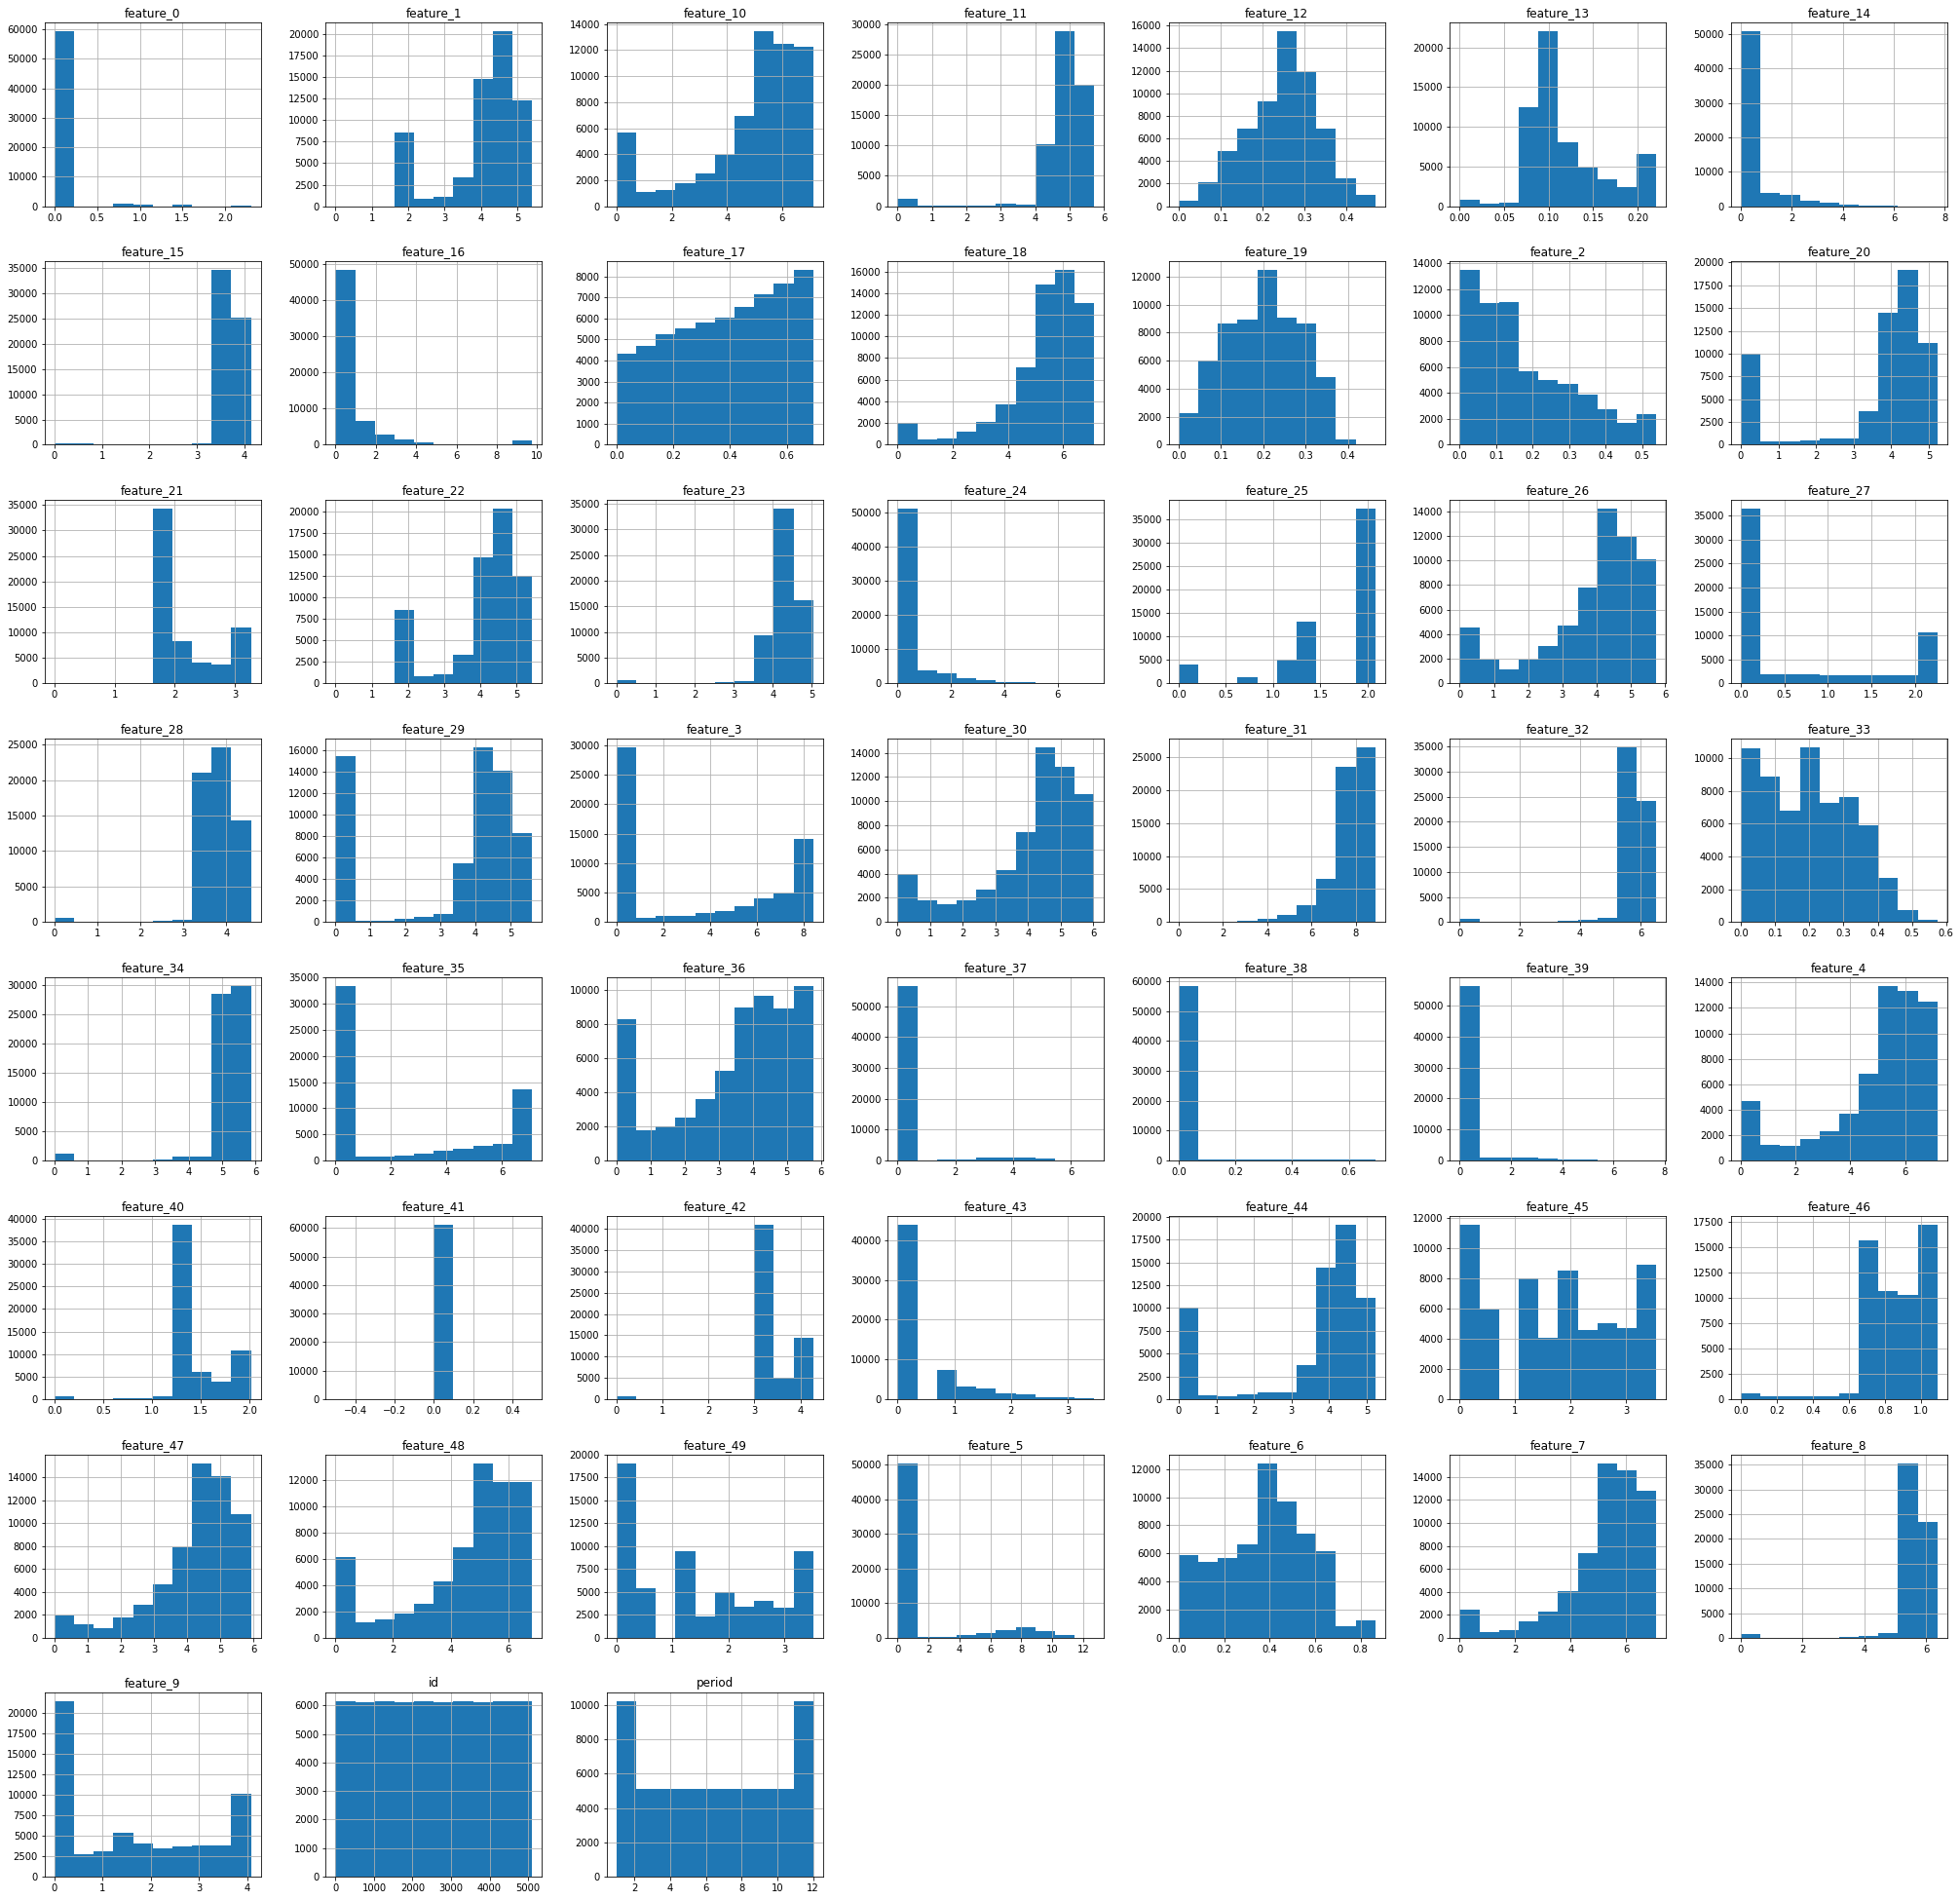

In [134]:
tabular_log_copy.hist(figsize = (35,35))
plt.show()

Aggregate data by client's id

In [135]:
def aggregate_data(df):
    
    return df.groupby('id').mean()

In [136]:
tabular_data = tabular_copy
tabular_log_data = tabular_log_copy
tabular_copy = aggregate_data(tabular_data)
tabular_log_copy = aggregate_data(tabular_log_data)

In [137]:
tabular_copy

,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
id,,,,,,,,,,,,,,,,,,,,,
0.0,6.5,110.000000,60.916667,0.238880,293.635812,430.134167,0.000000,0.445332,262.604583,147.666667,...,0.425000,0.0,11.535962,0.000000,59.875000,0.750000,0.508078,142.833333,315.011667,0.250000
1.0,6.5,110.000000,134.500000,0.060443,4146.130458,1047.271667,0.000000,0.350638,959.736250,114.500000,...,1.116667,0.0,44.414685,0.083333,125.000000,6.750000,0.331702,135.916667,167.895000,4.291667
2.0,6.5,110.166667,0.597500,0.195154,0.141369,4.168333,0.000000,0.559452,262.604583,10.166667,...,0.456667,0.0,0.000082,0.000000,0.597500,0.000000,0.195109,10.083333,2.470000,0.000000
3.0,6.5,110.000000,68.200000,0.183089,387.296608,210.265000,0.000000,0.512350,237.290000,100.791667,...,0.286667,0.0,0.040993,0.166667,60.063333,3.750000,0.484596,96.916667,139.873333,3.666667
4.0,6.5,110.000000,118.958333,0.133693,2447.212446,460.332500,0.000000,0.675918,522.449167,227.583333,...,1.714583,0.0,38.865381,0.166667,102.106667,30.208333,0.819175,190.333333,167.895000,19.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101.0,6.5,110.000000,94.166667,0.292280,180.142899,1044.730833,98.211165,0.143264,1091.008854,146.458333,...,0.269167,0.0,6.438021,0.000000,91.667500,12.083333,0.411332,167.250000,740.769583,6.500000
5102.0,6.5,110.000000,80.675000,0.383144,0.000000,215.499167,0.000000,0.772686,144.782500,99.458333,...,0.331250,0.0,0.000000,0.416667,74.583333,8.500000,0.453970,102.416667,187.505833,1.666667
5103.0,6.5,110.250000,22.568333,0.444470,0.000000,145.231667,0.000000,0.545115,64.091667,19.166667,...,1.415000,0.0,0.000000,0.333333,20.833333,5.583333,0.352421,17.250000,167.895000,7.666667


Add data from feature_50 to main table

In [138]:
joined_tabular = tabular_copy.merge(encoded_df, left_index=True, right_index=True)
joined_log_tabular = tabular_log_copy.merge(encoded_df, left_index=True, right_index=True)

In [139]:
joined_tabular.head(20)

,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,2718,3017,2310,402,3018,279,29,3457,4333,4728
id,,,,,,,,,,,,,,,,,,,,,
0.0,6.5,110.000000,60.916667,0.238880,293.635812,430.134167,0.000000,0.445332,262.604583,147.666667,...,0,0,0,0,0,0,0,0,0,0
1.0,6.5,110.000000,134.500000,0.060443,4146.130458,1047.271667,0.000000,0.350638,959.736250,114.500000,...,0,0,0,0,0,0,0,0,0,0
2.0,6.5,110.166667,0.597500,0.195154,0.141369,4.168333,0.000000,0.559452,262.604583,10.166667,...,0,0,0,0,0,0,0,0,0,0
3.0,6.5,110.000000,68.200000,0.183089,387.296608,210.265000,0.000000,0.512350,237.290000,100.791667,...,0,0,0,0,0,0,0,0,0,0
4.0,6.5,110.000000,118.958333,0.133693,2447.212446,460.332500,0.000000,0.675918,522.449167,227.583333,...,0,0,0,0,0,0,0,0,0,0
5.0,6.5,110.000000,125.808333,0.080617,1444.193392,588.143333,1369.297216,0.056866,386.006667,89.166667,...,0,0,0,0,0,0,0,0,0,0
6.0,6.5,110.000000,61.508333,0.329164,0.000250,1310.845000,0.000000,0.493060,1188.963750,262.500000,...,0,0,0,0,0,0,0,0,0,0
7.0,6.5,110.000000,105.791667,0.068348,1731.539177,1101.413750,0.000000,0.121416,1016.871979,317.500000,...,0,0,0,0,0,0,0,0,0,0
8.0,6.5,110.333333,1.250000,0.118104,93.693760,0.178333,0.000000,0.580400,2.395833,2.250000,...,0,0,0,0,0,0,0,0,0,0


In [140]:
def corr_to_drop(df):
    
    # Create correlation matrix for just Features to determine different models to test
    corr_matrix = df.corr().abs().round(2)

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # Find features with correlation greater than 0.90
    cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
    
    return cols_to_drop

In [141]:
cols_to_drop = corr_to_drop(joined_log_tabular)
print(cols_to_drop)

['feature_10', 'feature_18', 'feature_20', 'feature_22', 'feature_24', 'feature_26', 'feature_30', 'feature_33', 'feature_35', 'feature_36', 'feature_43', 'feature_44', 'feature_48', 'feature_49', 3045, 3644, 1860, 3920, 330, 1982, 3411, 823, 1165, 2468, 1640, 3033, 4417, 2403, 1990, 1970, 2136, 1682, 2311, 85, 729, 2211, 243, 1512, 1362, 4170, 1130, 982, 4977, 4333]


In [142]:
joined_log_tabular.drop(cols_to_drop, axis=1)

,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,3354,2718,3017,2310,402,3018,279,29,3457,4728
id,,,,,,,,,,,,,,,,,,,,,
0.0,6.5,0.000000,4.173833,0.206860,3.491360,5.928966,0.000000,0.366458,5.573808,5.786060,...,0,0,0,0,0,0,0,0,0,0
1.0,6.5,0.000000,4.927030,0.057509,8.303871,6.923605,0.000000,0.293923,6.810556,5.473083,...,0,0,0,0,0,0,0,0,0,0
2.0,6.5,0.115525,1.738506,0.171411,0.082661,1.031126,0.000000,0.424171,5.573808,5.243554,...,0,0,0,0,0,0,0,0,0,0
3.0,6.5,0.000000,4.277098,0.160230,2.882270,5.111314,0.000000,0.412988,5.418934,5.632289,...,0,0,0,0,0,0,0,0,0,0
4.0,6.5,0.000000,4.734173,0.125177,7.664669,6.040904,0.000000,0.507649,6.174652,5.996993,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101.0,6.5,0.000000,4.576911,0.253570,2.977742,6.916727,0.589406,0.099931,6.988918,5.381858,...,0,0,0,0,0,0,0,0,0,0
5102.0,6.5,0.000000,4.426689,0.320589,0.000000,5.111239,0.000000,0.571819,4.937932,5.630887,...,0,0,0,0,0,0,0,0,0,0
5103.0,6.5,0.149313,2.868459,0.363479,0.000000,3.790329,0.000000,0.424916,4.024219,5.287791,...,0,0,0,0,0,0,0,0,0,0


In [143]:
joined_tabular.drop(cols_to_drop, axis=1)

,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,3354,2718,3017,2310,402,3018,279,29,3457,4728
id,,,,,,,,,,,,,,,,,,,,,
0.0,6.5,110.000000,60.916667,0.238880,293.635812,430.134167,0.000000,0.445332,262.604583,147.666667,...,0,0,0,0,0,0,0,0,0,0
1.0,6.5,110.000000,134.500000,0.060443,4146.130458,1047.271667,0.000000,0.350638,959.736250,114.500000,...,0,0,0,0,0,0,0,0,0,0
2.0,6.5,110.166667,0.597500,0.195154,0.141369,4.168333,0.000000,0.559452,262.604583,10.166667,...,0,0,0,0,0,0,0,0,0,0
3.0,6.5,110.000000,68.200000,0.183089,387.296608,210.265000,0.000000,0.512350,237.290000,100.791667,...,0,0,0,0,0,0,0,0,0,0
4.0,6.5,110.000000,118.958333,0.133693,2447.212446,460.332500,0.000000,0.675918,522.449167,227.583333,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101.0,6.5,110.000000,94.166667,0.292280,180.142899,1044.730833,98.211165,0.143264,1091.008854,146.458333,...,0,0,0,0,0,0,0,0,0,0
5102.0,6.5,110.000000,80.675000,0.383144,0.000000,215.499167,0.000000,0.772686,144.782500,99.458333,...,0,0,0,0,0,0,0,0,0,0
5103.0,6.5,110.250000,22.568333,0.444470,0.000000,145.231667,0.000000,0.545115,64.091667,19.166667,...,0,0,0,0,0,0,0,0,0,0


Add target data

In [144]:
#if aggregated
trained_data = train.merge(joined_tabular, left_on='id', right_index=True)
trained_data = trained_data.set_index('id')

trained_log_data = train.merge(joined_log_tabular, left_on='id', right_index=True)
trained_log_data = trained_log_data.set_index('id')

In [145]:
trained_data.head(20)

,target,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,2718,3017,2310,402,3018,279,29,3457,4333,4728
id,,,,,,,,,,,,,,,,,,,,,
0,0,6.5,110.000000,60.916667,0.238880,293.635812,430.134167,0.000000,0.445332,262.604583,...,0,0,0,0,0,0,0,0,0,0
1,0,6.5,110.000000,134.500000,0.060443,4146.130458,1047.271667,0.000000,0.350638,959.736250,...,0,0,0,0,0,0,0,0,0,0
2,1,6.5,110.166667,0.597500,0.195154,0.141369,4.168333,0.000000,0.559452,262.604583,...,0,0,0,0,0,0,0,0,0,0
3,0,6.5,110.000000,68.200000,0.183089,387.296608,210.265000,0.000000,0.512350,237.290000,...,0,0,0,0,0,0,0,0,0,0
4,1,6.5,110.000000,118.958333,0.133693,2447.212446,460.332500,0.000000,0.675918,522.449167,...,0,0,0,0,0,0,0,0,0,0
5,0,6.5,110.000000,125.808333,0.080617,1444.193392,588.143333,1369.297216,0.056866,386.006667,...,0,0,0,0,0,0,0,0,0,0
6,1,6.5,110.000000,61.508333,0.329164,0.000250,1310.845000,0.000000,0.493060,1188.963750,...,0,0,0,0,0,0,0,0,0,0
7,0,6.5,110.000000,105.791667,0.068348,1731.539177,1101.413750,0.000000,0.121416,1016.871979,...,0,0,0,0,0,0,0,0,0,0
8,1,6.5,110.333333,1.250000,0.118104,93.693760,0.178333,0.000000,0.580400,2.395833,...,0,0,0,0,0,0,0,0,0,0


In [146]:
train_Y=pd.DataFrame(trained_data['target'].values,columns=['target'])
train_X=trained_data.drop(['target'],axis=1)

train_log_Y=pd.DataFrame(trained_log_data['target'].values,columns=['target'])
train_log_X=trained_log_data.drop(['target'],axis=1)

In [147]:
import seaborn as sns

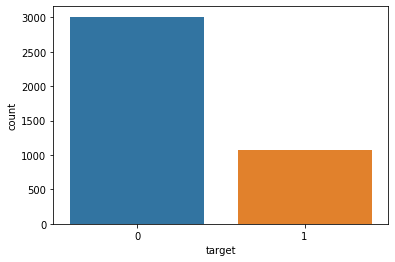

In [148]:
sns.countplot("target", data=train_Y)


In [149]:
def feature_scaling(df):
    
    scaled = MinMaxScaler().fit_transform(df)

    return pd.DataFrame(scaled, columns = df.columns)

In [150]:
scaled_tain_X = feature_scaling(train_X)
scaled_train_log_X = feature_scaling(train_log_X)

In [151]:
scaled_tain_X

,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,2718,3017,2310,402,3018,279,29,3457,4333,4728
0,0.0,0.00000,0.280077,0.333256,0.064892,0.328135,0.000000,0.420027,0.220868,0.369358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.618391,0.082047,0.916272,0.798929,0.000000,0.330708,0.807204,0.286957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.02439,0.002747,0.271697,0.000031,0.003180,0.000000,0.527669,0.220868,0.027743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.313563,0.254713,0.085590,0.160404,0.000000,0.483241,0.199577,0.252899,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.546935,0.185171,0.540821,0.351172,0.000000,0.637525,0.439416,0.567909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0.0,0.00000,0.274544,0.596563,0.000000,0.087030,0.000000,0.237815,0.180339,0.106625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4080,0.0,0.00000,0.232418,0.513035,0.000000,0.028934,0.000000,0.291523,0.051996,0.249586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4081,0.0,0.00000,0.175284,0.767241,0.000000,0.027398,0.000000,0.150288,0.125658,0.146791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4082,0.0,0.00000,0.217050,0.402575,0.008649,0.901937,0.000000,0.067081,0.796620,0.249586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Use PCA to reduce the data with minimum information loss.

In [152]:
from sklearn.decomposition import PCA

def sklearn_pca(data, n_components=None):
    
    pca = PCA(n_components)
    data_transformed = pca.fit_transform(data)
    return pca, data_transformed

In [153]:
pca_train, _ = sklearn_pca(scaled_tain_X)
pca_train_log, _ = sklearn_pca(scaled_train_log_X)

In [154]:
def plot_variance(pca):
    
    exp_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(exp_variance)
    plt.xlabel('No of Components')
    plt.ylabel('Explained Variance')
    plt.title('Explained Variance Ratio')
    plt.grid(b=True)
    plot = plt.show()

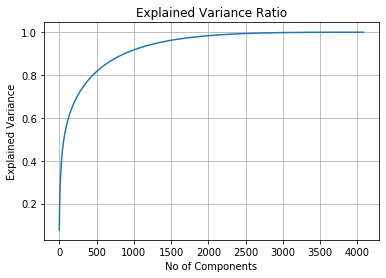

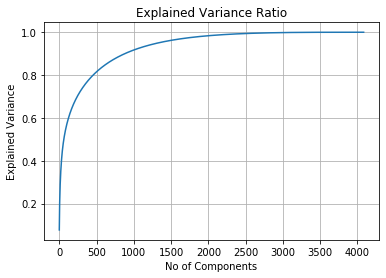

In [155]:
plot_variance(pca_train)
plot_variance(pca_train_log)


With 1000 features we can cover >90% of variance

In [156]:
pca_train, pca_train_transformed = sklearn_pca(scaled_tain_X, 1000)
pca_train_log, pca_train_log_transformed = sklearn_pca(scaled_train_log_X, 1000)

In [157]:
X_train, X_val, y_train, y_val = train_test_split(pca_train_log_transformed, train_Y, test_size=0.2)

In [158]:
len(X_train)

3267

Benchmark model

In [159]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train.values.ravel())


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
y_pred = lr.predict_proba(X_val)[:,1]
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(lr.score(X_val, y_val)))

Accuracy of logistic regression classifier on validation set: 0.75


In [161]:
print('Logistic regression ROC-AUC: {:.2f}'.format(roc_auc_score(y_val, y_pred)))

Logistic regression ROC-AUC: 0.68


Check couple most popular classification models

In [162]:
def train_and_predict(model, X_train, y_train, X_val, y_val):
    
    t = time.time()
    model = model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict_proba(X_val)[:,1]
    
    roc_score = roc_auc_score(y_val, y_pred)

    train_time = time.time() - t
    
    return roc_score, train_time

In [169]:
classifiers = [
    ("Nearest Neighbors", KNeighborsClassifier(3)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier()),
    ("XGBClassifier",xgb.XGBClassifier(random_state=42)),
    ("GradientBoostingClassifier", GradientBoostingClassifier(random_state=42))
]

In [170]:
result={
    'classifier':[],
    'score':[],
    'train_time':[]
}

In [171]:
for name, classifier in classifiers:
    score, t = train_and_predict(classifier, X_train, y_train, X_val, y_val)
    result['classifier'].append(name)
    result['score'].append(score)
    result['train_time'].append(t)

In [172]:
results_df = pd.DataFrame.from_dict(result, orient='index').transpose()

In [173]:
results_df

,classifier,score,train_time
0,Nearest Neighbors,0.599022,5.24445
1,Decision Tree,0.57324,4.48467
2,Random Forest,0.700551,7.78786
3,AdaBoost,0.713078,17.7246
4,XGBClassifier,0.742037,15.4821
5,GradientBoostingClassifier,0.748036,88.1415


It turned out that XGBoost and Gradient Boosting Classifiers have best score, the biggest difference is in training time. Therefore, I will tune XGBoost for final solution, as it is a way faster.

In [174]:
param_dict = {
        'n_estimators': range(800, 1100, 100),
        'max_depth': range(2, 5, 1),
        'eta': [0.05],
        'min_child_weight': (12, 16, 2)
}

param_grid = GridSearchCV(estimator = xgb.XGBClassifier(random_state=42),
                     param_grid = param_dict,
                     scoring = "roc_auc",
                     cv = 10,
                     n_jobs=-1, 
                     verbose=2)


In [175]:
%%time
param_grid.fit(X_train, y_train.values.ravel())


Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 59.9min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 123.2min finished


Wall time: 2h 5min 7s


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.05], 'max_depth': range(2, 5),
                         'min_child_weight': (12, 16, 2),
                         'n_estimators': range(800, 1

In [176]:
param_grid.best_score_, param_grid.best_params_

(0.7001520440204485,
 {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 16, 'n_estimators': 800})

In [177]:
best_model = param_grid.best_estimator_

In [178]:
y_pred = best_model.predict_proba(X_val)[:,1]
print('Best model ROC-AUC: {:.2f}'.format(roc_auc_score(y_val, y_pred)))

Best model ROC-AUC: 0.73


In [179]:
test_data = test.merge(joined_tabular, left_on='id', right_index=True)
test_data = test_data.set_index('id')

In [180]:
test_Y=pd.DataFrame(test_data['score'].values,columns=['score'])
test_X=test_data.drop(['score'],axis=1)

In [181]:
scaled_test_X = feature_scaling(test_X)

In [182]:
best_model.fit(scaled_tain_X, train_Y.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=16, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [183]:
rf_preds = best_model.predict_proba(test_X)[:,1]

In [184]:
data = {'id': test_X.index, 'score': rf_preds}
solution_df = pd.DataFrame(data=data)

In [185]:
solution_df.head(50)

,id,score
0,4084,0.091107
1,4085,0.253345
2,4086,0.134075
3,4087,0.152115
4,4088,0.502232
5,4089,0.356063
6,4090,0.448743
7,4091,0.203760
8,4092,0.049828
9,4093,0.360865


In [186]:
solution_df.to_csv('KanarovskaYuliia_test.csv', index=False, sep=',')